<h1 style="color:orange">Breast Cancer Prediction</h1> 

**By Yuvraj Singh**  





<h3 style="color:orange">Introduction:</h3> 

- Breast cancer is a significant health concern worldwide, ranking as the second most common cancer among women, trailing only behind skin cancer. 
- In 2022 alone, it led to the tragic loss of over 670,000 lives globally <a href="https://www.who.int/news-room/fact-sheets/detail/breast-cancer" style="color: red">(World Health Organization - Breast Cancer)</a>.
- Remarkably, breast cancer emerges as the primary cancer affecting women in 157 out of 185 countries across the world.

<h4 style="color:orange">About the Dataset:</h4>

- The Breast Cancer Wisconsin (Diagnostic) Data Set encompasses data from 569 samples of both malignant (cancerous) and benign (non-cancerous) breast tumors. 
- These samples provide crucial insights into the characteristics of breast tumors, aiding researchers in understanding and classifying them accurately. 
- The dataset includes unique ID numbers for each sample, along with corresponding diagnoses denoted as 'M' for malignant and 'B' for benign. 
- Additionally, it comprises 30 real-value features computed from digitized images of cell nuclei, such as radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension.
- You can find more information about the dataset and its sources <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29" style="color: red">here</a>.

<h4 style="color:orange">Objective:</h4>

- Since the labels in the data are discrete, the prediction falls into two categories, (i.e., Malignant or benign). Therefore, in machine learning, this is a classification problem.
- The goal is to classify whether the breast cancer is benign or malignant by using machine learning classification method.

<h4 style="color:orange">Result:</h4>

We predict breast cancer by using machine learning models. We used four methods, but the best accuracy is achieved by k-Nearest Neighbors **(knn_model_acc): 98.25% (11nn)**.



<h1 style="color:orange; font-size:26px">Importing required libraries</h1> 


In [1455]:
# importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

<h1 style="color:orange; font-size:26px">Load and inspecting the data</h1> 


**We examined the general features of data**

In [1456]:
# reading data into the dataframe
df = pd.read_csv('.........../git hub/Breast Cancer/wisc_bc_data.csv')

In [1457]:
# displaying first five rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [1458]:
# shape of the dataframe
df.shape

(569, 32)

In [1459]:
# concise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [1460]:
# column names
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [1461]:
# checking for null values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<h1 style="color:orange; font-size:26px">Data manipulation</h1> 

**Extracted unnecessary features from the data**

In [1462]:
# dropping id column Therefore, a model that includes an identifier 
# will most likely suffer from overfitting, 
# and is not likely to generalize well to other data.
new_data = df.drop(['diagnosis',"id"],axis=1) #"axis = 1" indicates to delete the whole column |"inpalce = True" means replace master data, does not create a copy

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [1463]:
# descriptive statistics of data
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [1464]:
# get the correlation
new_data.iloc[:,0:30].corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


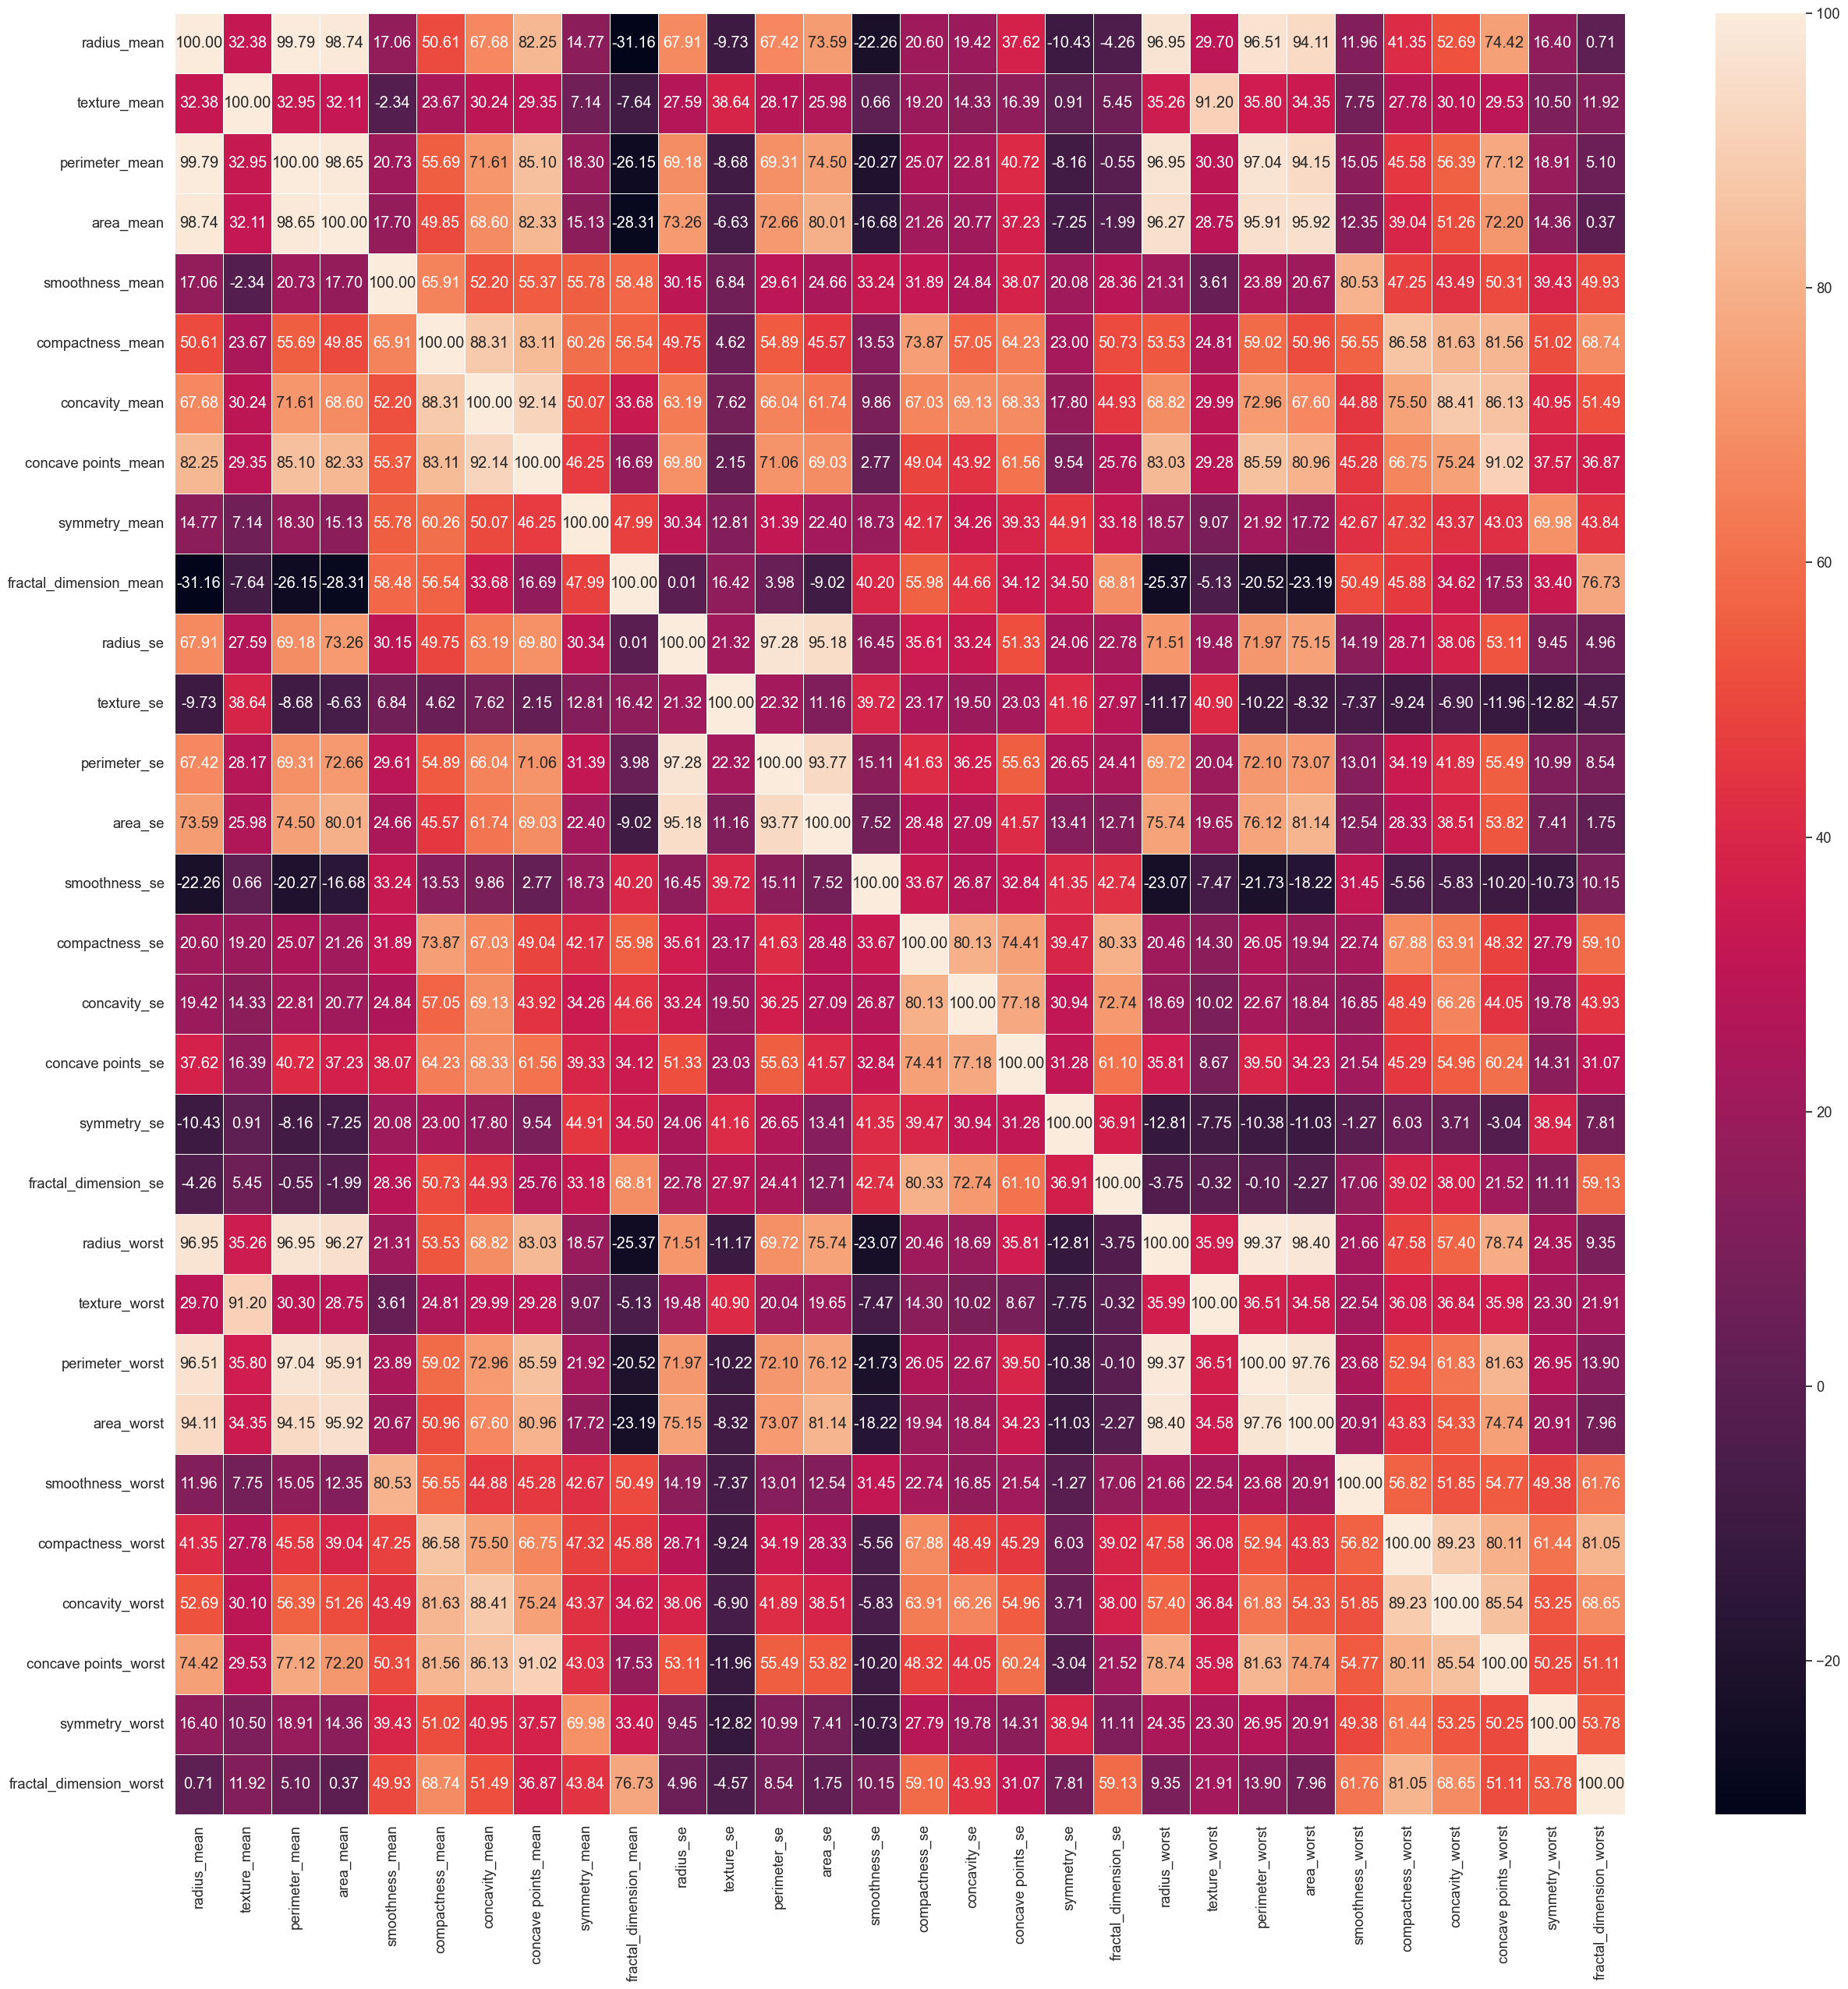

In [1465]:
plt.figure(figsize=(30, 30))
corr = new_data.corr() * 100  # Convert correlation values to percentages
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5)
plt.show()

In [1466]:
new_data.skew()


radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

<h4 style="color:orange; font-size:26px">Data Preprocessing and Building Models</h4>

<h4 style="color:orange; font-size:22px">Data Preprocessing </h4>



In [1467]:
df['diagnosis'].value_counts()


diagnosis
B    357
M    212
Name: count, dtype: int64

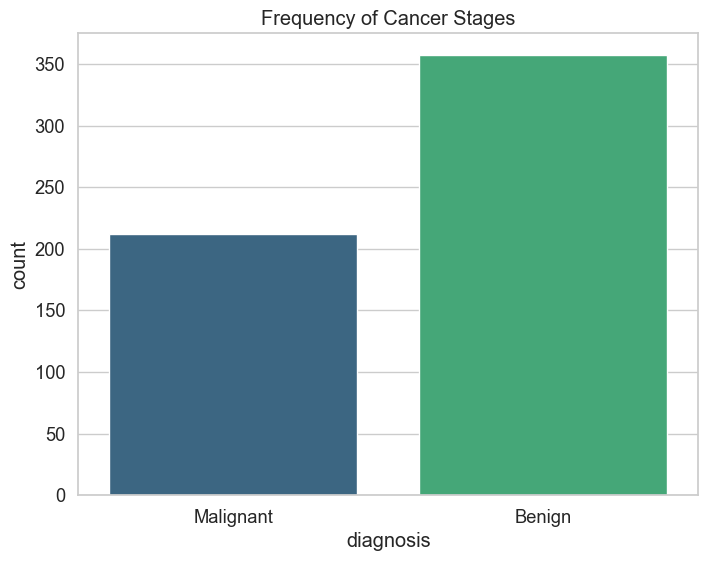

In [1468]:
# Change category names in 'diagnosis' column
df['diagnosis'] = df['diagnosis'].map({'M': 'Malignant', 'B': 'Benign'})


# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df, hue='diagnosis', palette='viridis')

plt.title('Frequency of Cancer Stages')

# Show plot
plt.show()

In [1469]:


x = (new_data - np.min(new_data))/(np.max(new_data) - np.min(new_data))
x


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.004229,0.002440,0.028867,0.235308,0.000028,0.000065,0.000071,0.000035,0.000057,0.000019,...,0.005966,0.004074,0.043394,0.474612,0.000038,0.000156,0.000167,0.000062,0.000108,0.000028
1,0.004835,0.004177,0.031241,0.311707,0.000020,0.000018,0.000020,0.000016,0.000043,0.000013,...,0.005874,0.005503,0.037330,0.459803,0.000029,0.000044,0.000057,0.000044,0.000065,0.000021
2,0.004629,0.004995,0.030559,0.282793,0.000026,0.000038,0.000046,0.000030,0.000049,0.000014,...,0.005541,0.006001,0.035849,0.401740,0.000034,0.000100,0.000106,0.000057,0.000085,0.000021
3,0.002685,0.004791,0.018237,0.090762,0.000033,0.000067,0.000057,0.000025,0.000061,0.000023,...,0.003505,0.006229,0.023242,0.133451,0.000049,0.000204,0.000161,0.000061,0.000156,0.000041
4,0.004770,0.003371,0.031758,0.304890,0.000024,0.000031,0.000047,0.000025,0.000043,0.000014,...,0.005299,0.003919,0.035778,0.370240,0.000032,0.000048,0.000094,0.000038,0.000056,0.000018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.005068,0.005263,0.033380,0.347673,0.000026,0.000027,0.000057,0.000033,0.000041,0.000013,...,0.005983,0.006206,0.039046,0.476493,0.000033,0.000050,0.000097,0.000052,0.000048,0.000017
565,0.004732,0.006641,0.030842,0.296427,0.000023,0.000024,0.000034,0.000023,0.000041,0.000013,...,0.005569,0.008992,0.036436,0.406911,0.000027,0.000045,0.000076,0.000038,0.000060,0.000016
566,0.003902,0.006601,0.025458,0.201716,0.000020,0.000024,0.000022,0.000012,0.000037,0.000013,...,0.004462,0.008021,0.029784,0.264222,0.000027,0.000073,0.000080,0.000033,0.000052,0.000018
567,0.004843,0.006895,0.032934,0.297367,0.000028,0.000065,0.000083,0.000036,0.000056,0.000016,...,0.006051,0.009267,0.043394,0.428068,0.000039,0.000204,0.000221,0.000062,0.000096,0.000029


In [1470]:
y = df.diagnosis
y

0      Malignant
1      Malignant
2      Malignant
3      Malignant
4      Malignant
         ...    
564    Malignant
565    Malignant
566    Malignant
567    Malignant
568       Benign
Name: diagnosis, Length: 569, dtype: object

<h4 style="color:orange; font-size:22px">Splitting the data into train and test </h4>


In [1471]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
print(x_train)
print("Shape of training set:", x_train.shape)
print("Shape of test set:", x_test.shape)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
68      0.002122      0.004074        0.013820   0.058886         0.000025   
181     0.004958      0.006246        0.033545   0.308181         0.000027   
63      0.002156      0.003258        0.013916   0.061331         0.000018   
248     0.002504      0.005929        0.015987   0.081570         0.000023   
60      0.002391      0.003498        0.015174   0.073319         0.000027   
..           ...           ...             ...        ...              ...   
71      0.002089      0.003441        0.013820   0.057358         0.000023   
106     0.002736      0.004309        0.017670   0.096968         0.000027   
270     0.003359      0.003954        0.021227   0.148707         0.000015   
435     0.003286      0.004612        0.021420   0.140926         0.000025   
102     0.002863      0.004824        0.018152   0.107828         0.000019   

     compactness_mean  concavity_mean  concave points_mean  sym

<h4 style="color:orange; font-size:22px">Classification Models </h4>

<h4 style="color:orange; font-size:18px">K Nearest Neighbours </h4>


In [1472]:
# to find which value shows the lowest mean error
error_rate = []

for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

    


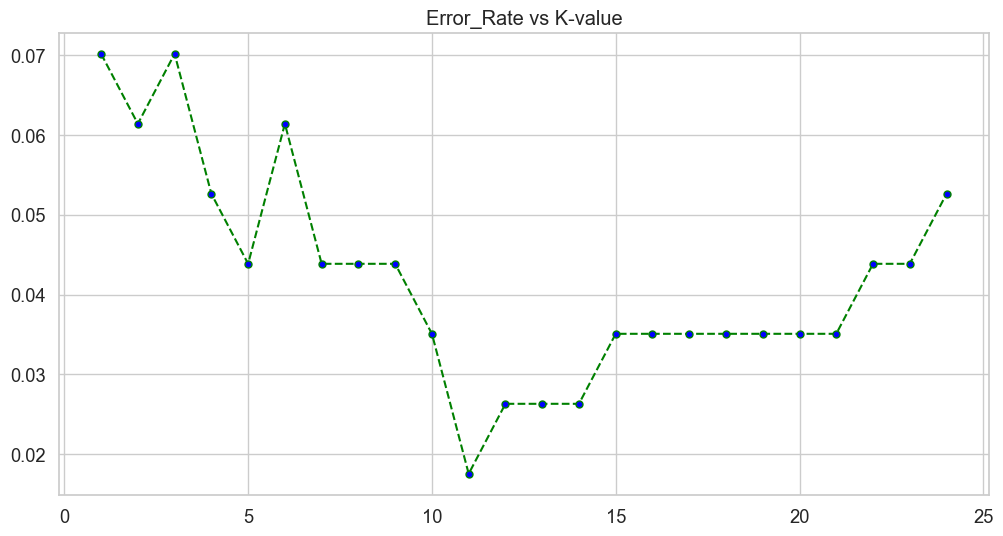

In [1473]:
plt.figure(figsize=(12,6))
plt.plot(range(1,25), error_rate, color='green', linestyle="--",
         marker='.', markersize=10, markerfacecolor='b')
plt.title('Error_Rate vs K-value')
plt.show()

In [1474]:

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)
predictions1 = knn.predict(x_test)

In [1475]:
print(confusion_matrix(y_test, predictions1))
print("\n")
print(classification_report(y_test, predictions1))

[[71  0]
 [ 2 41]]


              precision    recall  f1-score   support

      Benign       0.97      1.00      0.99        71
   Malignant       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [1476]:
knn_model_acc = accuracy_score(y_test, predictions1)
print("Accuracy of K Neighbors Classifier Model is: ", knn_model_acc)

Accuracy of K Neighbors Classifier Model is:  0.9824561403508771


<h4 style="color:orange; font-size:18px">Logistic Regression </h4>


In [1477]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
predictions2 = logreg.predict(x_test)

In [1478]:

print("Confusion Matrix: \n", confusion_matrix(y_test, predictions2))
print('\n')
print(classification_report(y_test, predictions2))

Confusion Matrix: 
 [[71  0]
 [11 32]]


              precision    recall  f1-score   support

      Benign       0.87      1.00      0.93        71
   Malignant       1.00      0.74      0.85        43

    accuracy                           0.90       114
   macro avg       0.93      0.87      0.89       114
weighted avg       0.92      0.90      0.90       114



In [1479]:
logreg_acc = accuracy_score(y_test, predictions2)
print("Accuracy of the Logistic Regression Model is: ", logreg_acc)

Accuracy of the Logistic Regression Model is:  0.9035087719298246


<h4 style="color:orange; font-size:18px"> Random Forests </h4>


In [1480]:
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(x_train, y_train)
predictions4 = rfc.predict(x_test)

In [1481]:

print("Confusion Matrix: \n", confusion_matrix(y_test, predictions4))
print("\n")
print(classification_report(y_test, predictions4))

Confusion Matrix: 
 [[70  1]
 [ 3 40]]


              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        71
   Malignant       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [1482]:

rfc_acc = accuracy_score(y_test, predictions4)
print("Accuracy of Random Forests Model is: ", rfc_acc)

Accuracy of Random Forests Model is:  0.9649122807017544


<h4 style="color:orange; font-size:18px">Support Vector Machines (SVM) </h4>


In [1483]:


svc_model = SVC(kernel="rbf")
svc_model.fit(x_train, y_train)
predictions5 = svc_model.predict(x_test)

In [1484]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions5))
print("\n")
print(classification_report(y_test, predictions5))

Confusion Matrix: 
 [[71  0]
 [ 6 37]]


              precision    recall  f1-score   support

      Benign       0.92      1.00      0.96        71
   Malignant       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [1485]:

svm_acc = accuracy_score(y_test, predictions5)
print("Accuracy of SVM model is: ", svm_acc)

Accuracy of SVM model is:  0.9473684210526315


In [1486]:
print(knn_model_acc)
print(logreg_acc)
print(rfc_acc)
print(svm_acc)

0.9824561403508771
0.9035087719298246
0.9649122807017544
0.9473684210526315


<h4 style="color:orange; font-size:26px">Conclusion</h4>



After conducting predictive analysis on breast cancer data using various machine learning algorithms, we have obtained the following accuracies:

- **k-Nearest Neighbors: 98.25%**
- Random Forest Classifier: 96.49%
- Support Vector Machine: 94.74%
- Logistic Regression: 90.35%


Among these algorithms, k-Nearest Neighbors demonstrated the highest accuracy of **98.25%**, making it the most effective model for predicting breast cancer in this dataset. These results indicate the potential of machine learning techniques in accurately diagnosing breast cancer, which can significantly contribute to improving patient outcomes and advancing healthcare practices.
